# Introduction to Machine Learning Project : Personal Loan Campaign

### **Problem Statement**
Alllife Bank is US Bank that has growing customer base most they have depositer which consider as liablities of the bank. Although there are borrowers (Assets)as well but they are very less and bank is intrested to increase those borrowers by providing the loan to eligible customers so that they can earn interest on loans money that eventually increase the bank revenue.

Basically Bank wants to explore the ways to convert those depositer (liablities) to borrowers (Assets) while retaining them as deposites.

Last year bank has ran campaing for liablity customer on which they get healthy success rate over 9%. Now this time the marketing department want to run a campaing to targeted customer to increase the sucess ratio.

### **Ojbective**:

Our objective is to identify those customer who's would be interested to buy the loan considering their profile looks eligible to give them a loan.

### Importing the libraries



In [47]:
import numpy as np                  #This will help us to perform numerical operation
import pandas as pd                 #This allow us to manupulate with data
import matplotlib.pyplot as plt     #This will help us to creat the plots
import seaborn as sns               #This will allow us to create even more advance plot and pre-defined theme
from sklearn.model_selection import train_test_split, GridSearchCV  #this will allow us to split the data and find the best hyperparameter combination for model
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix #These metrics will help us to measure the model performance
from sklearn.tree import DecisionTreeClassifier  #This helps us to impliment decision tree algorithm for the classification task.
from sklearn import tree            #For visualizing the tree
from sklearn.tree import plot_tree  #To visualize the Decision rule




###Accessing the google Drive

In [48]:
#access the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
#reading the file
data = pd.read_csv('/content/drive/MyDrive/AIML/ML/Project/Loan_Modelling_2.csv')

In [50]:
#copy the data to keep our oroginal data safe.
df = data.copy()

#**Understanding the Data** (Data background and contents)

## **Data Dictionary**

|Column_Name | Description | Data_type|
|----------- | ----------- | ---------|
|ID| Unique Identifier for each Customer | int64|
|Age| Customer's age in completed years | int64|
|Experience| Years of professional experience | int64|
|Income| Annual income of the customers (In thousand Dollors) | int64|
|ZIPCode| Home Address Zipcode | int64|
|Family| The Family size of the customer | int64|
|CCAvg| Average spending on credit card per month (In thousands dollors) | float64|
|Education| Education level. 1:Undergrad, 2:Graduate, 3:Advance/Professional | int64|
|Mortgage| Value of the house mortgage if any (In thousand dollors) | int64|
|Personal_Loan| Did the customer accept the personal loan in last campaign | int64|
|Securities_Account| Does the customer have securities account with Bank | int64|
|CD_Account| Does the customer have Certificate of Deposite (CD) account with Bank | int64|
|Online| Do customer use the internet banking facilities | int64|
|CreditCard| Does the customer uses the Credit Card issued by any other bank (Exluding All Life Bank) | int64|


###Showing first and last 5 record of the Datafram

In [ ]:
df.head(5)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
df.tail(5)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


## Checking the size of the Data

In [52]:
data.shape

(5000, 14)

- There are 5000 rows and 14 columns.
- It looks great to perform data analysis.

### Checking the datatype and overall data structure

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


- Every columns has 5000 records which means there are no missing value in dataset.
- All columns data type is `int64` except CCAvg columns.
- CCAvg columns has `float64` data type.


## Checking the Duplicated Values

In [54]:
df.duplicated().sum()

np.int64(0)

- There are no duplicated value in the dataset.

### Descriptive Statistics:



In [55]:
df.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


 - **Age**: Customer's age range from `23 to 67` and the average age is `45` years

 - **Experience**: Minimum age is `-3` which is not possible in experience column, it may be typo error which we need to handle. And the maximum age is `43` years.

 - **Income**: Customer's income range from minimum `8000 dollors to maximum 224k` in which `75% customers have 98000 dollors` income which indicates that mostly customers falls under the bracket from lower to medium.

 - **Family**: Customer's family size from `1 to 4`

 - **Mortgage**: Majority of the customers has `zero` mortgage and whoever has mortgage they are speard in the data because `some customer has very high mortgage value`.  

 - **CCAvg**: Customer's average spending on Credits card from `0 to 10000 dollors.`
 - **Education**: Education columns is a categorical columns and `label endocing is aready applied on it`.  
 - **Personal Load**: This is `our target variable` and `mean is 0.960` which means only 9% customer has accepted the loan which is imbalanced.

 - **Binary/Categorical variable**: `Securities_Account`, `CD_Account`, `Online`, `CreditCard`. these are binary indicator (0/1)


#Data Cleaning

## Checking Missing Values

In [56]:
# Check for missing values
print(df.isnull().sum())

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64


## Now we will fix the Negative value in Experience column

In [57]:
# Checking the rows where experience is negative
print("\nThese are negative rows of  experience (before cleaning):")
print(df[df['Experience'] < 0]['Experience'].value_counts())



These are negative rows of  experience (before cleaning):
Experience
-1    33
-2    15
-3     4
Name: count, dtype: int64


In [58]:
# We will replace negative values with the median value of the column for better imputation
median_exp = df[df['Experience'] >= 0]['Experience'].median()

df['Experience'] = df['Experience'].apply(lambda x: median_exp if x < 0 else x)

print(f"We have replaced the Negative Value with median ({median_exp}).")
print(f"Now we can see the number of rows after cleaning: {df[df['Experience'] < 0].shape[0]}")

We have replaced the Negative Value with median (20.0).
Now we can see the number of rows after cleaning: 0


In [59]:
df['Experience'].describe()

,Experience
count,5000.000000
mean,20.327600
std,11.253035
min,0.000000
25%,11.000000
50%,20.000000
75%,30.000000
max,43.000000


- We have fixed the Negative value in experience columns as min is zero now.

## Removing the Unecessary columns

- **ZipCode:** In the dataset it Region is not mentinoed for the zip code and zip code is numerical value which is not addreessing any location or region so it is not useful in this case.  As it's a high cardinality and it is not showing any relevance for the business for now so dropping this column would great for model simplicity.

- **ID:** As I have checked above that there is no duplicated value in the dataset which there are no chance that any customer have multiple purchases (Loan/Securities Account)

- Also it is not revealing any pattern so I will not consider ID columns in Univariate analysis.

- So I will drop the 'ID' column as it is just an identifier and not useful for the modeling

In [60]:
# Dropping Irrelevant Columns
df.drop(['ID', 'ZIPCode'], axis=1, inplace=True)

print("\nHere is the Cleaned DataFrame columns:", df.columns.tolist())


Here is the Cleaned DataFrame columns: ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']


#Exploratory Data Analysis (EDA)



##Univariate Analysis

In [61]:
#List of the Numerical column excluding 'ID' and 'ZipCode'
num_col = ['Age','Experience','Income','CCAvg','Mortgage']


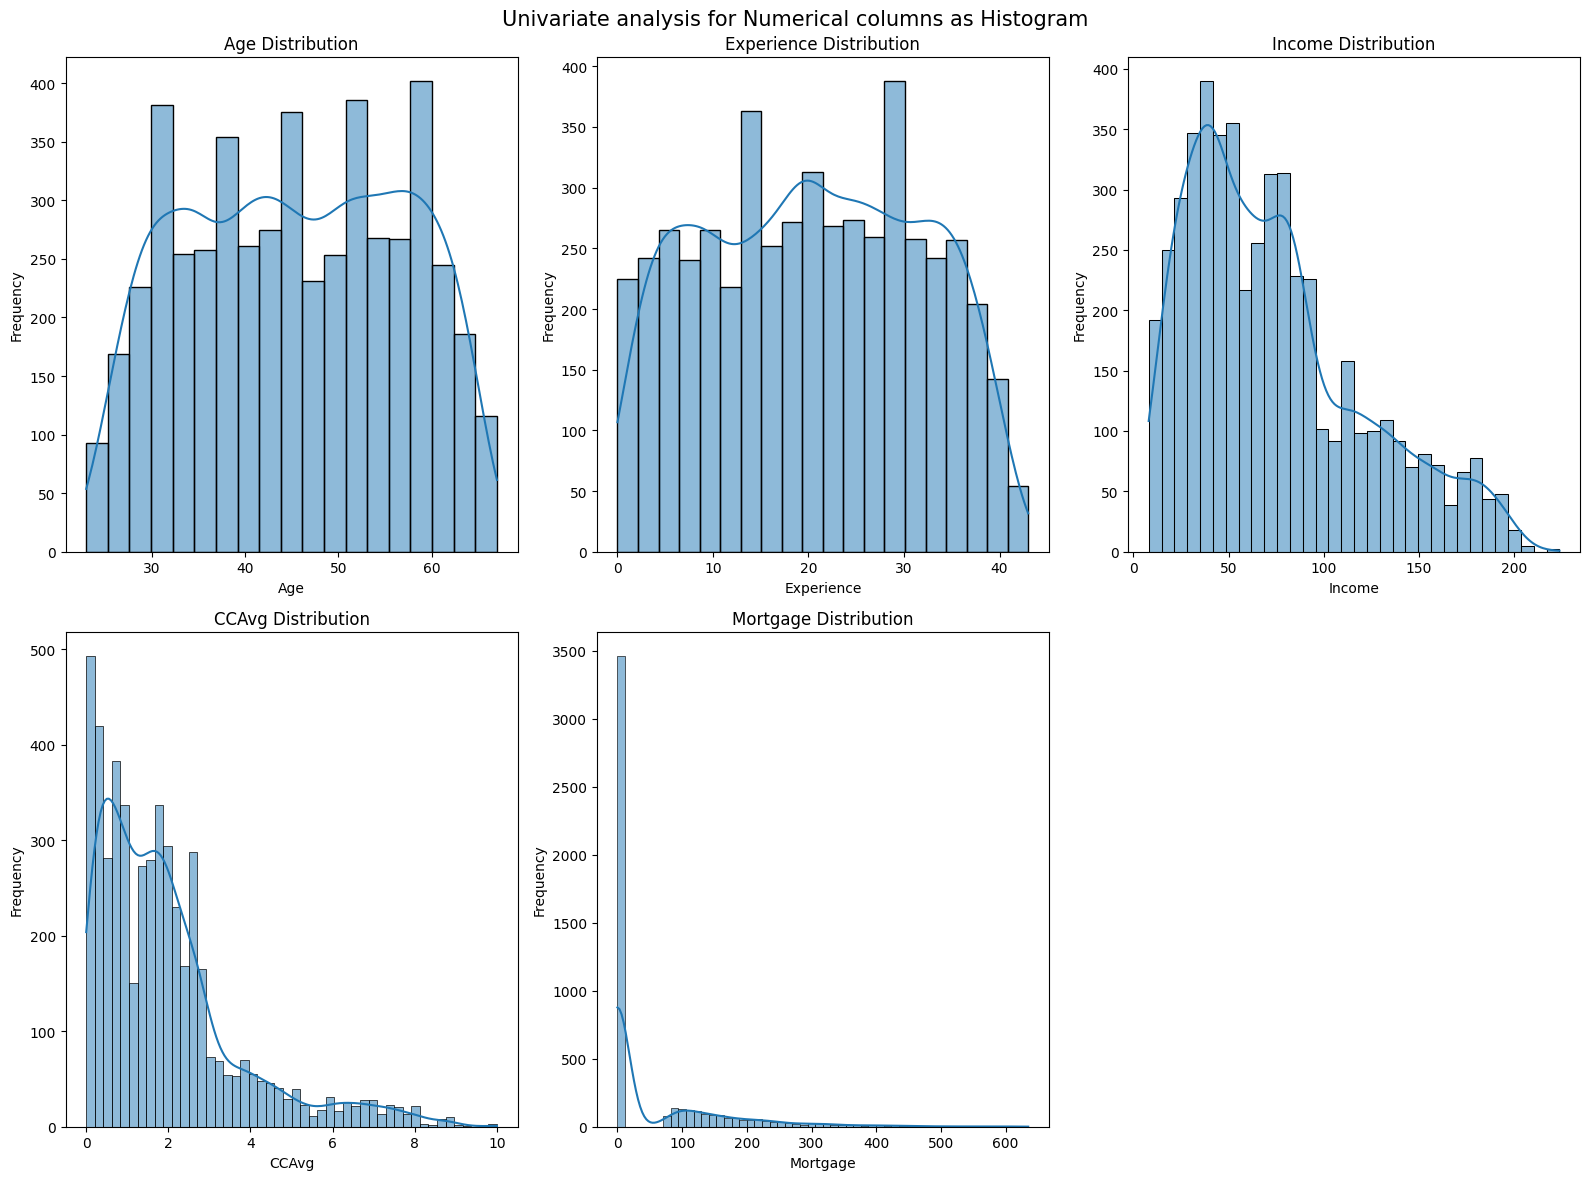

In [62]:
#Ploting the Histogram for Numerical colomns
plt.figure(figsize =(16,12))                             #This will create bigger plot with width of 16 and height of 12 inch
plt.suptitle('Univariate analysis for Numerical columns as Histogram', fontsize =15)      #This would be the title name for bigger plot
for i, col in enumerate(num_col):                                                         #Iterate over each column to crate subplot
  plt.subplot(2,3, i + 1)                                                                 #Creating the subplot with 2 rows and 3 columns
  sns.histplot(df[col], kde= True)                                                        #Plotting the histogram
  plt.title(f'{col} Distribution')                                                         #Setting the title for each subplot
  plt.xlabel(col)                                                                         #Giving the name for xlabel
  plt.ylabel('Frequency')                                                                 #Giving the name for ylabel
plt.tight_layout()                                                                        #this will adjust the subplot in figure properly
plt.show()                                                                                #This will show the plot



##Following are the observation from Univariate Analysis for Numerical columns.
- **Age** : Distribution `looks uniform` which indicates that every age customers are evenly distributed. There is no skewness in the Age column.

- **Experience** : This also looks similar to Age colums where `different experience customers are evenly distributes`.

- **Income** : `This is right skewed features`. Mostly customers falls under the bracket from lower to medium. Also there are customer with very high income.

- **CCAvg** : `This is also right skewed data`. Mostly customers don't spend much via credit card and there are very few customer who spent much with Credits. There are very few peop who spend much with credit Cards.

- **Mortgage** : `This is also right skewed feature`. There is big hipe at zero which indicates that majority of the customers has zero mortgage and whoever has mortgage they are speard in the data.

In [63]:
#Creating the list for Categorical/Binary columns for univariate analysis
categorical_col = ['Family', 'Education', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']


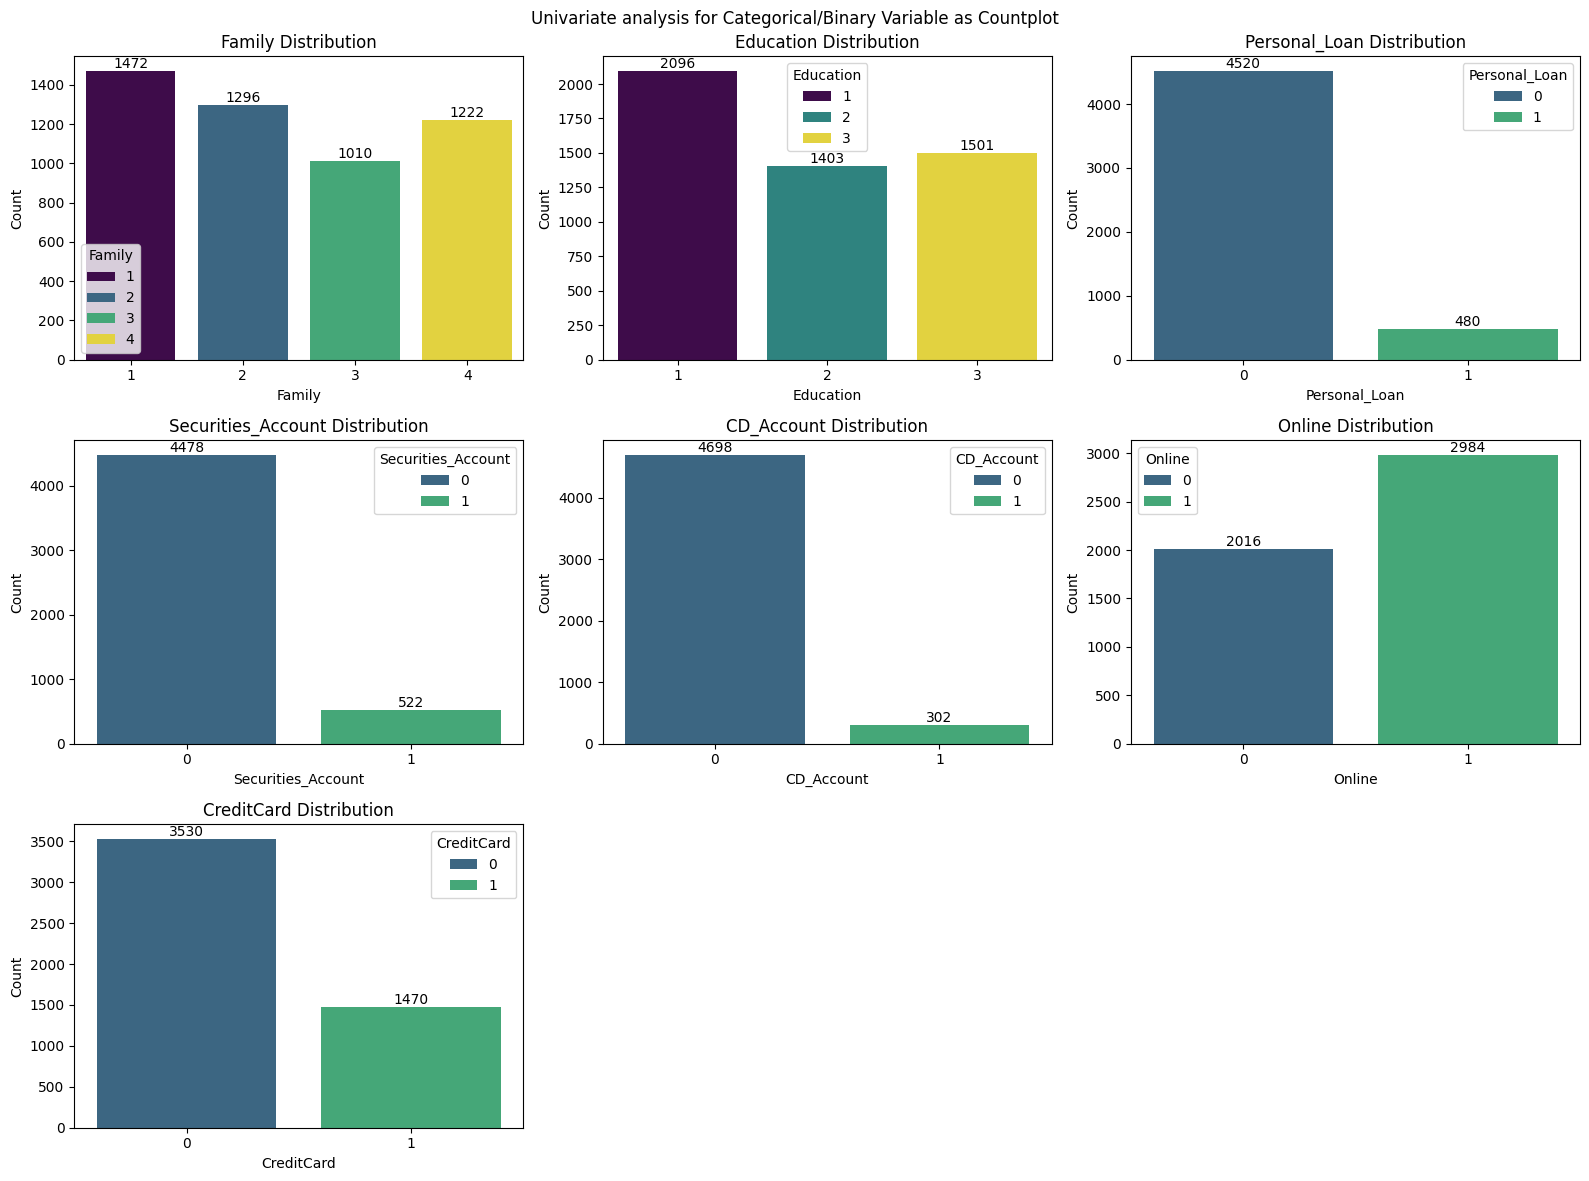

In [64]:
#Creating the countplot for categorical columns for univariate analysis
plt.figure(figsize=(16,12))                         #This will create bigger plot with width of 16 and height of 12 inch
plt.suptitle('Univariate analysis for Categorical/Binary Variable as Countplot', fontsize =12)      #This would be the title name for bigger plot

for i, cat_col in enumerate(categorical_col):                                                       #Iterate over each column to crate subplot
  plt.subplot(3,3,i+1)                                                                              #Creating the subplot with 3 rows and 3 columns
  sns.countplot(data = df, x= cat_col, palette= 'viridis', hue= cat_col, legend= True)             #Creating the countplot
  plt.title(f'{cat_col} Distribution')                                                              #Setting the title for each subplot
  plt.xlabel(cat_col)                                                                               #Giving the name for xlabel
  plt.ylabel('Count')                                                                               #Giving the name for ylabel

  for container in plt.gca().containers:                                                            #Iterate over each container to get the exact count of each bar
    plt.gca().bar_label(container)
plt.tight_layout()                                                                                  #this will adjust the subplot in figure properly
plt.show()                                                                                          #This will show the plot.

##Following are the observation from Univariate Analysis for Categorical/Binary Variables.
- **Family** :  1 means single and 4 means larger where we can see that `1 and 4 member of family are larger compare to 2 and 3 family member`.

- **Education** :  `Maximum customer are belong to Education level  1 and 3` where 1 represent the (Undergraduate) and 3 represent the (Advance / Professional) and `less customers are belong to Education level 2 (Graduate)`

- **Personal Loan (Target Value)** :   `This features is highly imbalanced because there large number of people has not taken the loan` and very few customer has taken the loan.


- **Securities Account** : `Most of the customer don't have the securities account.` Very few people has the security account.

- **CD_Account (Certificate of Deposite)** :  Similary `Majority of the customer don't have the CD Account.` Only few customer has CD Account.

- **Online** : `Internet Banking user are larger in number` compare to customer who don't use internet banking.

- **Credit_Card** : `Spender of Credit Card are very less.` Most of the  customers don't have the credit card of other Bank.

# **Bivariate Analysis**

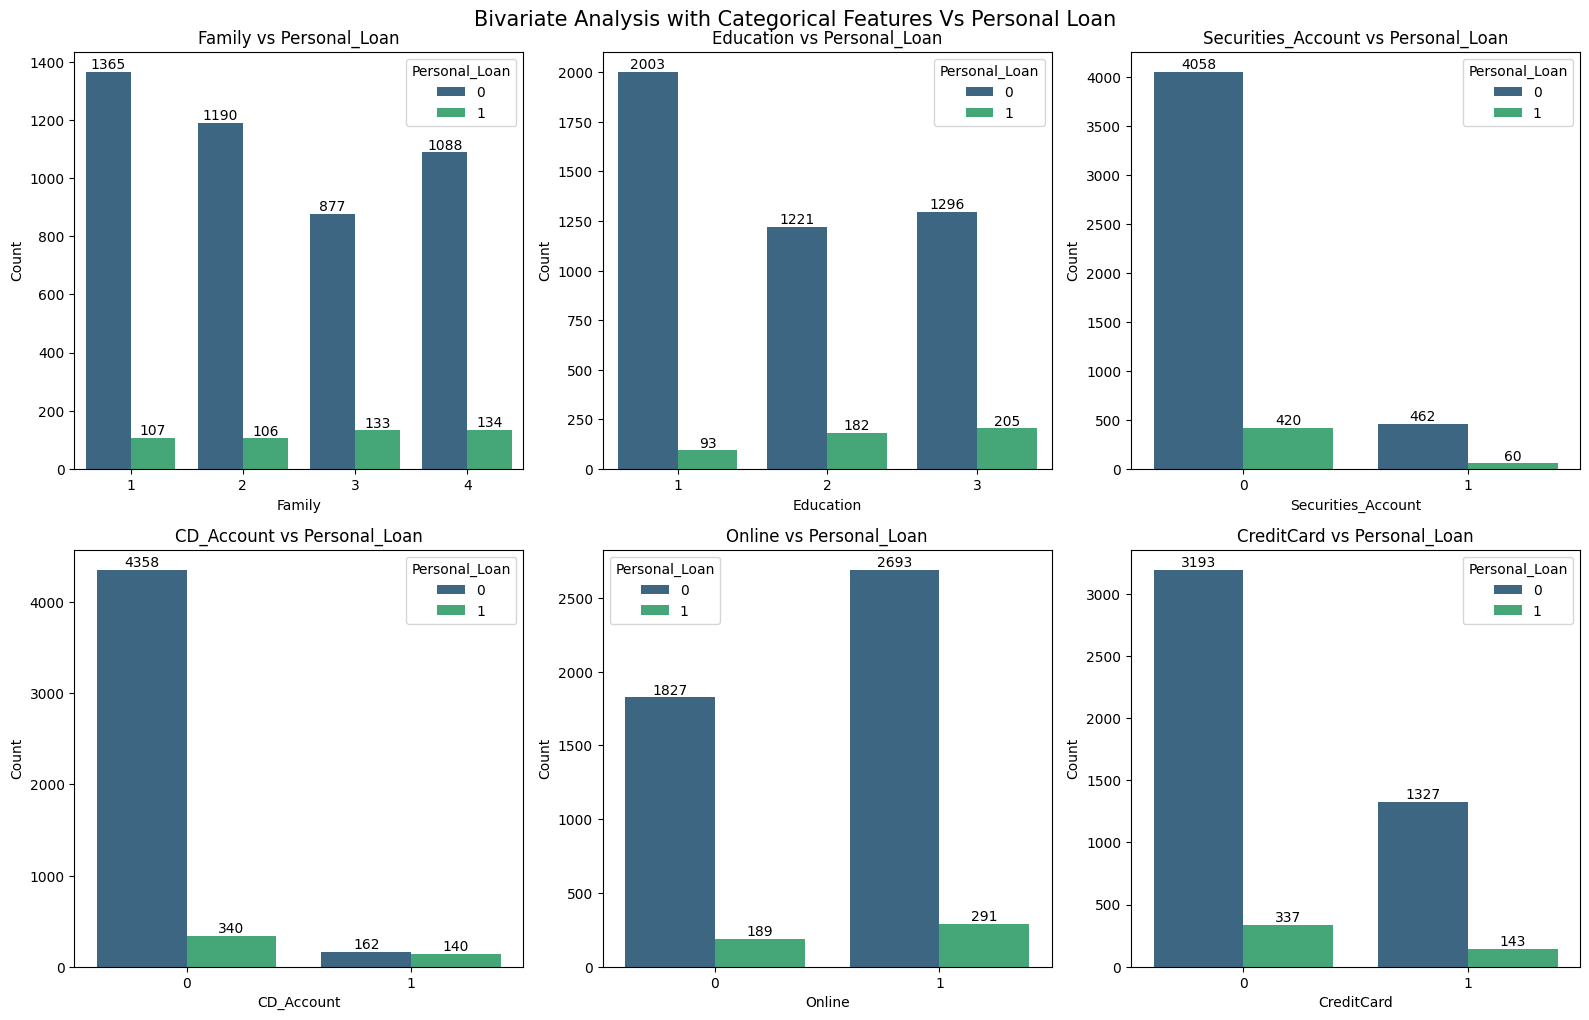

In [65]:
#Creating the list for Categorical/Binary columns for Bivariate analysis
categorical_col_bivariate = ['Family', 'Education', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']



## Plotting Countplots for categorical variables against Personal_Loan (showing proportions)
plt.figure(figsize=(16,15))                                        #This will create bigger plot with width of 18 and height of 15 inch
plt.suptitle('Bivariate Analysis with Categorical Features Vs Personal Loan', fontsize =15)     #This would be the title name for bigger plot
for i, cat_col in enumerate(categorical_col_bivariate):                                         #Iterate over each column to crate subplot
  plt.subplot(3,3,i+1)                                                                          #Creating the subplot with 3 rows and 3 columns
  sns.countplot(data= df, x= cat_col, hue= 'Personal_Loan', palette= 'viridis', legend= True)  #Creating the Countplot for each columns
  plt.title(f'{cat_col} vs Personal_Loan')                                                      #Setting the title for each subplot
  plt.xlabel(cat_col)                                                                           #Giving the name for xlabel
  plt.ylabel('Count')                                                                           #Giving the name for ylabel
  for container in plt.gca().containers:                                                        #Iterate over each container to get the exact count of each bar
    plt.gca().bar_label(container)
plt.tight_layout()                                                                              #this will adjust the subplot in figure properly
plt.show()                                                                                      #this will show the plot


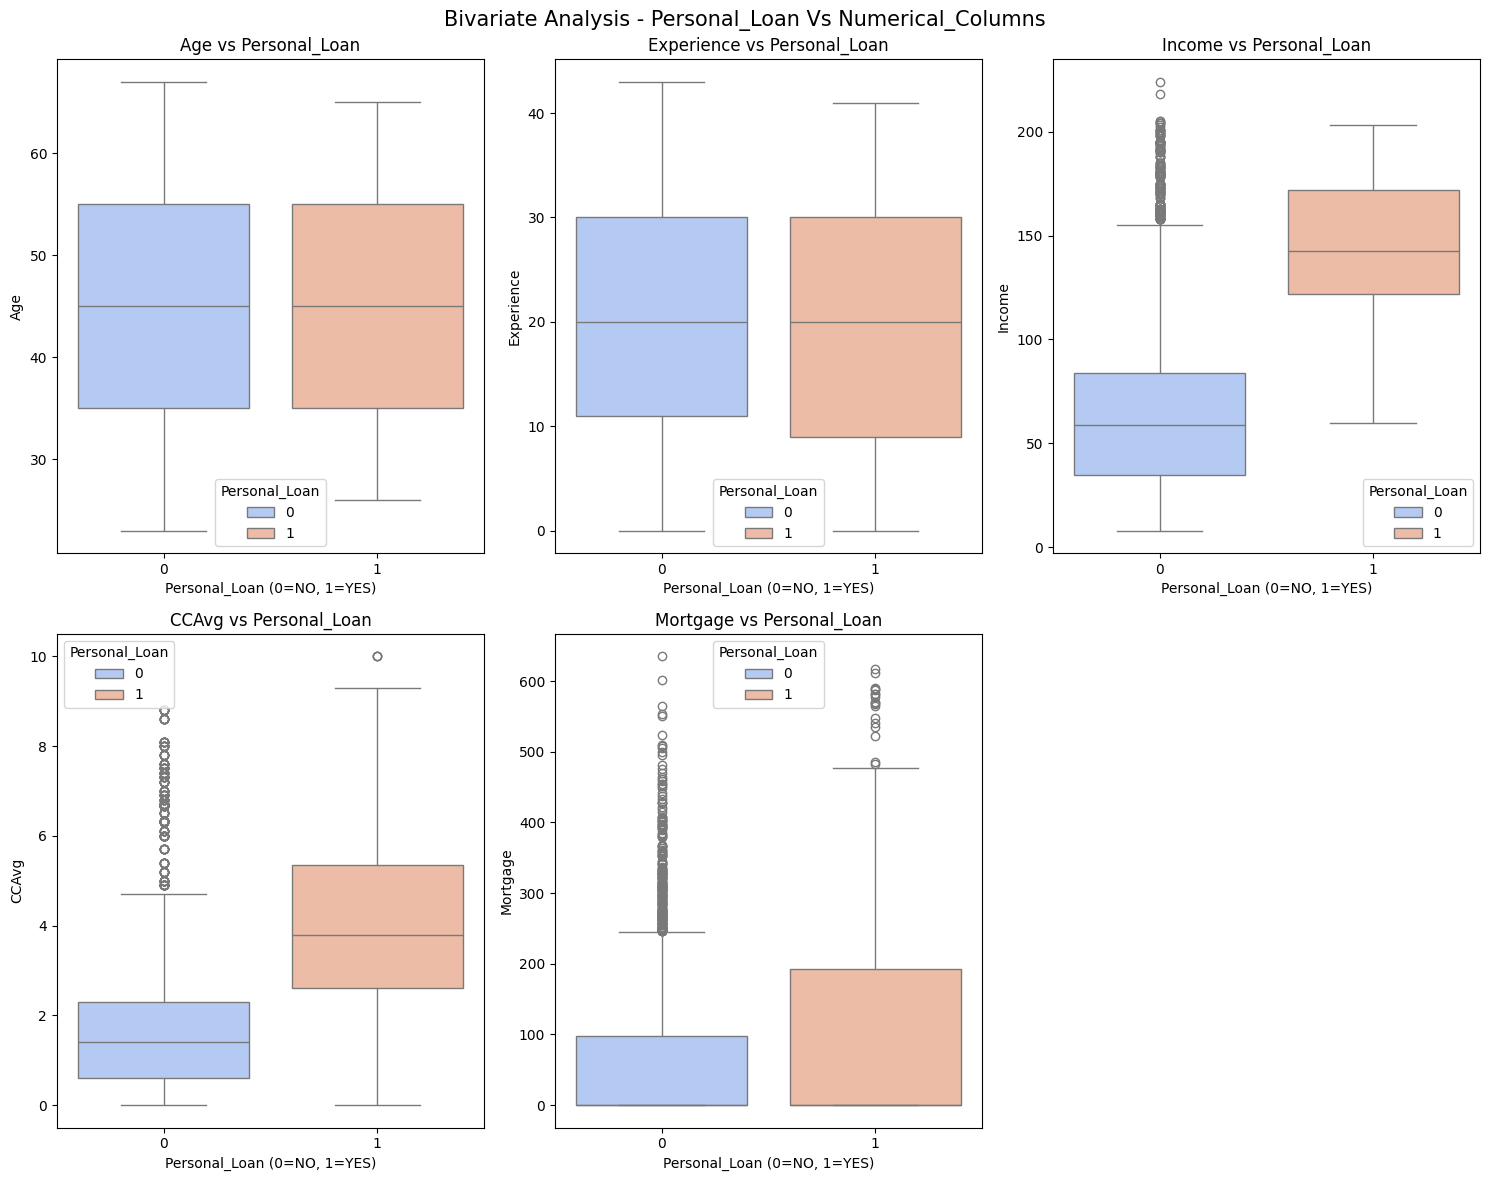

In [66]:
#Creating the Boxplot to perform the bivariate analysis with Numerical Columns
plt.figure(figsize=(15,12))                       #This will create bigger plot with width of 15 and height of 12 inch
plt.suptitle('Bivariate Analysis - Personal_Loan Vs Numerical_Columns', fontsize =15)       #This would be the title name for bigger plot
for i, num_cols in enumerate(num_col):                                                      #Iterate over each column to crate subplot
  plt.subplot(2,3,i+1)                                                                      #Creating the subplot with 3 rows and 2 columns
  sns.boxplot(data= df, x= 'Personal_Loan', y= num_cols, palette = 'coolwarm', hue= 'Personal_Loan', legend= True)   ##Creating the Box plot
  plt.title(f'{num_cols} vs Personal_Loan')                                                 #Setting the title for each subplot
  plt.xlabel('Personal_Loan (0=NO, 1=YES)')                                                 #Giving the name for Xlabel
  plt.ylabel(num_cols)                                                                      #Giving the name for Ylabel
  plt.tight_layout()                                                                        #this will adjust the subplot in figure properly
plt.show()                                                                                  #this will show the plot


## **Obeservation from  Numerical Variables vs. Personal_Loan (Boxplots) And Categorical/Binary Vs Personal Loan**

- **Income**:  Customers who have accepted the loan have higher income compare than the customer who have not accepted the loan.
    
    `Meaningful Insight`: Income has strong influence on purchasing the loan which means there are higher chance that high income customer may take loan. Marketing team can target these customers.

- **CCAvg (Credit Card Average Spending)**: Similar to income, customer who have taken the personal loan have higher spending on credit card compare to the customer who have not taken the personal loan.

    `Meaningful Insight`: There are higher chances to avail the loan by the people who take loans compare than with custome who don't take loans.


- **Age**: There are not much difference in the customer who have taken the loan and who have not takent the loan.

    `Meaningful Insight`: In this Dataset Age does note have strong influence to purchase the loan.  

- **Experience**: Just like the Age column, there is no significant difference between customer who have taken or not taken the loan.

    `Meaningful Insight`: Similar to income features, In this Dataset Experience column also don't have strong influence to purchase the loan.

- **Mortgage**: Customer who have taken the loan they are showing less frequency of `0 Mortgage` which indicates they have bigger mortgage comparing then the customer who have not taken the loan.

    `Meaningful Insight`: Customer who have mortgage on them have the high probability to take loan however as we have seen a bigger portion of customer have `0 Mortgage` which makes this column little tricky.

## **Another Option**:  Look at the propotion of Categorical Variable for clearer insights.

In [67]:
print('\n---- Propotion Analysis for Categorical Variable Vs Personal Loan ----')
print('Personal_Loan (0 = Not, 1 = Yes)')
for col in categorical_col_bivariate:
  print(f'\n{col} Vs Personal Loan')

  #Calculate the cross tabulation (count)
  cross_tab = pd.crosstab(df[col], df['Personal_Loan'])
  print('Propotion in Count')
  print(cross_tab)

  #Calculate the propotion (percentage) for loan acceptance
  cross_tab_percentage = pd.crosstab(df[col], df['Personal_Loan'], normalize= 'index')*100
  print('\nPropotion (% of each category laon acceptance)')
  print(cross_tab_percentage)
  print('-' * 30)



---- Propotion Analysis for Categorical Variable Vs Personal Loan ----
Personal_Loan (0 = Not, 1 = Yes)

Family Vs Personal Loan
Propotion in Count
Personal_Loan     0    1
Family                  
1              1365  107
2              1190  106
3               877  133
4              1088  134

Propotion (% of each category laon acceptance)
Personal_Loan          0          1
Family                             
1              92.730978   7.269022
2              91.820988   8.179012
3              86.831683  13.168317
4              89.034370  10.965630
------------------------------

Education Vs Personal Loan
Propotion in Count
Personal_Loan     0    1
Education               
1              2003   93
2              1221  182
3              1296  205

Propotion (% of each category laon acceptance)
Personal_Loan          0          1
Education                          
1              95.562977   4.437023
2              87.027798  12.972202
3              86.342438  13.657562
------

## **Observaton from `propotion` of Categorical Variable**.
- **Family :** Loan acceptance percentage for family size 3 and 4 is 13.16% and 10.97% which is greater than family size 1 and 2 which indicates that big size family need loans.

- **Education :** Education level 2 and 3 (Graduate and Advance/Professional) are showing 12.97% and 13.66% which more higher than Education level 1 (Undergraduate) So targeting to Education leve 2 and 3 would be benificial.

- **Securities_Account :** Customer who has the security account are with 11.9% and customer who have not security acount with (9.37%). Not much difference between loan acceptor or not acceptor.

- **CD_Account (Ceritification of Deposite) :** Customer who has CD accont their loan acceptance rate is 46.36% which is extremely high then the customer who have not CD account (7.24%) So this variable could be a strong predictor to purchase the loan.  

- **Online :** Customer who access the internet banking (9.75%) and who don't access (9.37%) are not have much difference in both categories so in this dataset Online features is not strong predictor.

- **Credit_Card :** Just like the online features, Credit card also not a strong predictor as people use Credit card are with 9.72% and who don't 9.54% so there is not much difference.

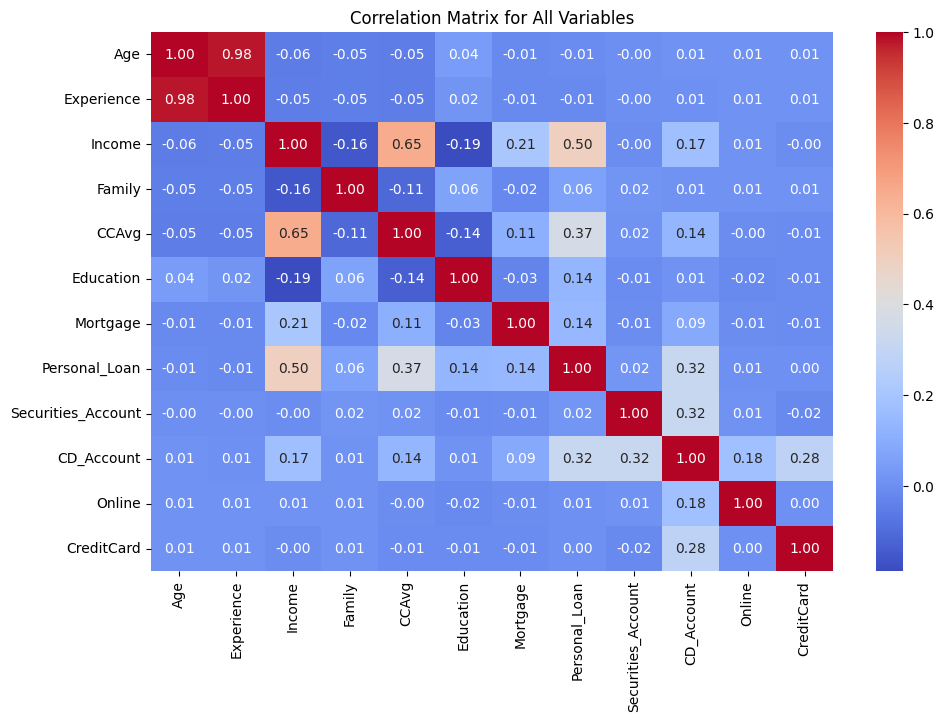

In [68]:
#Correlation Analysis
plt.figure(figsize=(11, 7))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for All Variables')
plt.savefig('Correlation_EDA_heatmap.png')
plt.show()

##Observation from Correlation
- Income (0.50),CCAvg (0.37) and CD_Account(0.32) has strong Positive correlation with Personal Loan (Target Variable)
-  Age and Experience are highly correlated with (0.98) which is expected.

## key Observation from Overall Summary  (Visualize the Important Features)
  Strong Predictor (Positive corelation with Loan Acceptance)
  - **Income :** Higher income, higher chances of taking loan.
  - **CCAvg :** Higher Credit Card spenders  have tendency to take loans.
  - **CD Account  :** This variable is strong predictor in the analysis.
  - **Education :** Graduate and Advance/Professional are more likely to take loan.
  - **Family :** Larger family with 2 and 3 family have the probability to take loan.

 -------**Weak Predictor Variable** -------------

 1. Age
 2. Experience
 3. Online
 4. Credit Card
 5. Security Account (Although it is slightly positive trend however it's not strong predictor)
 6. Mortgage (It is highly skewed towards 0 which means it's not store predictor too)


#Checking the outliers and see if treatment is required. (Outlier Detection (treat, if needed))

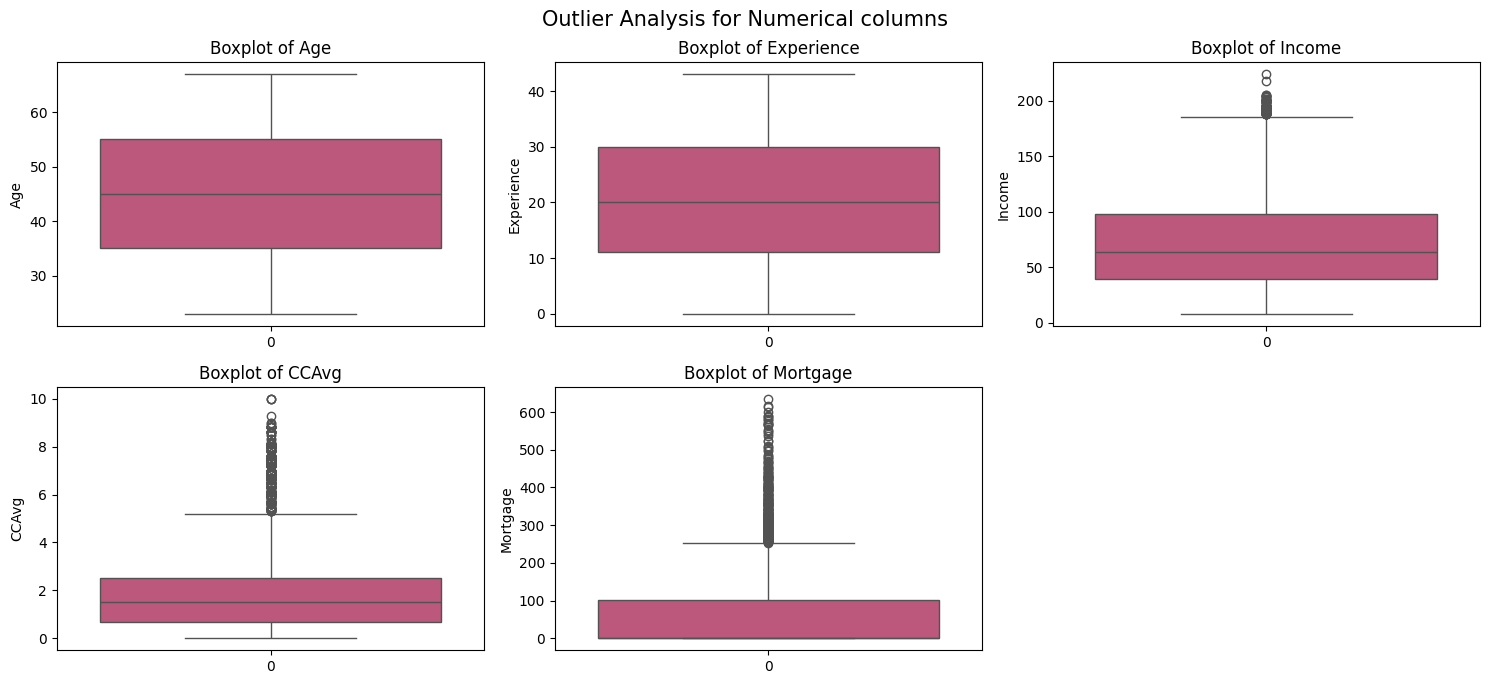

In [69]:
#list of numerical columns to detect outliers
num_cols_outlier = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']                               #Created list of numerical column to detech the outliers
plt.figure(figsize =(15,10))                                                                          #This will create bigger plot with width of 15 and height of 10 inch
plt.suptitle('Outlier Analysis for Numerical columns', fontsize =15)                                  #This would be the Title for bigger plot
for i, num_cols in enumerate(num_cols_outlier):                                                       #Iterate over each column to crate subplot
  plt.subplot(3, 3, i + 1)                                                                            #crated the subplot with 3 rows and 3 columns
  sns.boxplot(y = df[num_cols], palette= 'plasma', x = [0]*len(df), hue= [0]*len(df), legend= False)  #created the box plot and assign dummy data to x to avoid future warning
  plt.title(f'Boxplot of {num_cols}')                                                                 #Setting the title for each subplot                                                                          #Giving the name for xlabel
  plt.ylabel(num_cols)                                                                                #Giving the name for ylabel
plt.tight_layout()                                                                                    #this will adjust the subplot in figure properly
plt.show()                                                                                            #this will show the plot

## Observation from outliers
- **Age and Experience**  Age and Experiece has no significate outliers.  Data points are under the whiskers.

  **Insight :**  Data are evenly distributed in both features. There is nothing in the data that can strong influece to model.


- **Income**  There are so many outliers in the data whch are above the upper whiskers which indicates that there are many customer have extremely high income.

  **Insight :**  We need to treat these outliers because this may cause a significant impact on the model.


- **CCAvg(Credit Card Average Spending)**  There are so many outliers in the data whch are above the upper whiskers which indicates that there are many customer who spend more with Credit Cards compare than average spender.

  **Insight :**  Outliers in CCAvg required a treatment as it may have significant impact on model.


- **Mortgage**  There are so many outliers in this features as we have already seen in univariate analysis. Majority of the customer are on zero mortgage. And whoever have mortgage they are spread every as outliers.

  **Insight :**  High mortgage values customers are outliers and it is very important to treat them.


## Outlier Treatment

There are multiple ways to treat outliers such as:
1. Capping/Flooring(Winsorization) This will limit to outliers at certain percent value.
2. Transformation: It uses the log transformation to normalize the data which actually reduce the impact of outliers.
3. Removal : In rare scenerio we remove the data only if that is typing error or loss data wuold not significate for the model.

- As we have seen that (Spending, income, mortgage) has many outliers so as per the nature of features this is very common so in this case Capping/Flooring(Winsorization) or Transformation would be more suitable for this dataset.

- So first we will use the transformation becuase these features(Spending, income, mortgage) is right skwed and log transformation will reduce the skewness and spread of outliers.

## Applying log Transformation

- First we will apply the log transformation on features (CCAvg, Mortgage, Income)
- Note as log(0) is undefined  and we have 0 values in CCAvg and Mortgage so we will use log1p which can handle 0 values very well. So np.log1p woudl be the best option for CCAvg and Mortgage features.


In [70]:
#Created the Columns to apply log transformation
log_cols = ['Income', 'CCAvg', 'Mortgage']

#Iterate on each features to apply transformation
for col in log_cols:
  df[f'{col}_log'] = np.log1p(df[col])

#verify if the transformation appllied properly by descriptive statistics
print('Descriptive Statistics after Log Transformation')
print(df[['Income_log', 'CCAvg_log', 'Mortgage_log']].describe())

Descriptive Statistics after Log Transformation
        Income_log    CCAvg_log  Mortgage_log
count  5000.000000  5000.000000   5000.000000
mean      4.106952     0.929356      1.566982
std       0.679975     0.533274      2.366428
min       2.197225     0.000000      0.000000
25%       3.688879     0.530628      0.000000
50%       4.174387     0.916291      0.000000
75%       4.595120     1.252763      4.624973
max       5.416100     2.397895      6.455199


## Plotting Histogram for transformed numerical variable to see the change

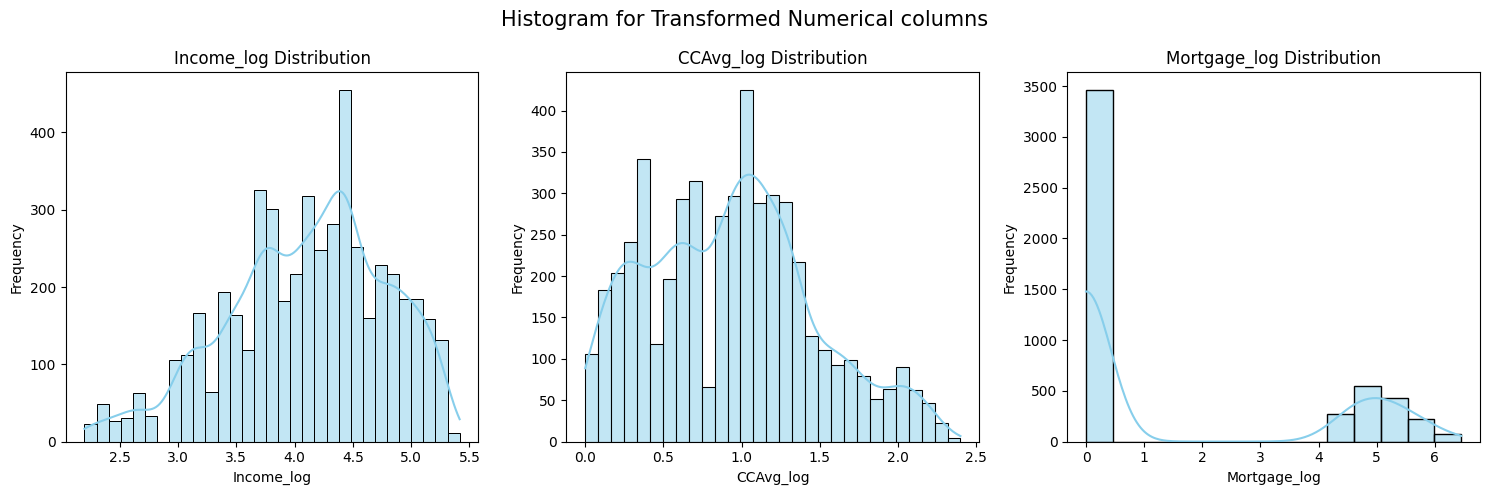

In [71]:
#plot the histogram for transformed numerical variable
plt.figure(figsize =(15,5))                                                                     #This will create bigger plot with width of 15 and height of 5 inch
plt.suptitle('Histogram for Transformed Numerical columns', fontsize =15)                       #This would be the Title for bigger plot
for i, col in enumerate(log_cols):                                                              #Iterate over each column to crate subplot
  plt.subplot(1,3,i+1)                                                                          #crated the subplot with 1 rows and 3 columns
  sns.histplot(df[f'{col}_log'], kde= True, color = 'skyblue')                                  #created the histogram and used fixed color to avoid future warning
  plt.title(f'{col}_log Distribution')                                                          #Setting the title for each subplot
  plt.xlabel(f'{col}_log')                                                                      #Giving the name for xlabel
  plt.ylabel('Frequency')                                                                       #Giving the name for ylabel
plt.tight_layout()                                                                              #this will adjust the subplot in figure properly
plt.show()                                                                                      #this will show the plot

## Observation from Transformed Numerical columns with Histogram
-  **Income_log :** After the transformation distribution looks more normalize even it looks near to bell shape curve.

-  **CCAvg :** This also looks much better and skewness has reduced and the values are evenly spread.

-  **Mortgage :** Distribution are high concentrated towards 0 due to it's original zero mortgage value of customers however non-zero values are now distributed and skewness looks reduced.


## Plotting Boxplotfor transformed numerical variable to see the change

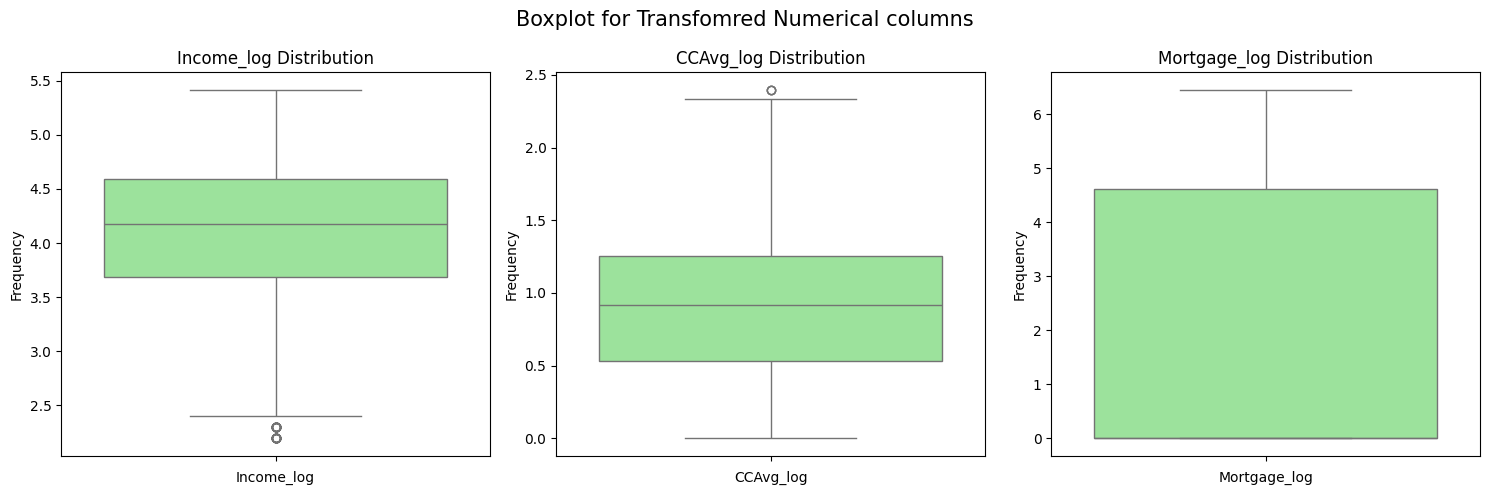

In [72]:
#Creating the boxplot
plt.figure(figsize =(15,5))                                                              #This will create bigger plot with width of 15 and height of 5 inch
plt.suptitle('Boxplot for Transfomred Numerical columns', fontsize =15)                  #This would be the Title for bigger plot
for i, col in enumerate(log_cols):                                                       #Iterate over each column to crate subplot
  plt.subplot(1, 3 , i+ 1)                                                               #ICreating the plot with 1 row and 3 column
  sns.boxplot(y = df[f'{col}_log'], color = 'lightgreen')                                #created the box plot and use fix color to avoid future warning
  plt.title(f'{col}_log Distribution')                                                   #Setting the title for each subplot
  plt.xlabel(f'{col}_log')                                                               #Giving the name for xlabel
  plt.ylabel('Frequency')                                                                #Giving the name for ylabel
plt.tight_layout()                                                                       #this will adjust the subplot in figure properly
plt.show()                                                                               #this will show the plot

## Observation from Transformed Numerical columns with Boxplot
-  **Income_log :** After the transformation outliers has gone down substantially. Now the boxplot looks more clear with less outliers.

-  **CCAvg :** Just like Income in this features outliers has gone down substantially. Now the data points looks more condensed.

-  **Mortgage :** Outliers are still showing in this due to it's original zero mortgage value of customers however non-zero values are now distributed.

# Feature Engineering

- **ZipCode** : In the dataset it Region is not mentinoed for the zip code and zip code is numerical value which is not addreessing any location or region so it is not useful in this case.  As it's a high cardinality and it is not showing any relevance for the business for now so dropping this column would great for model simplicity. We have already dropped the ZipCodea above in Data Cleaning Section.

- **Education** : Label encoding is alrady applied on this column so for now one-hot encoding is not needed bacause Decision Tree model can handle this features.

#Data Pre-processing (Data preparation for modelling)

- Originial coloumns that were not log transformed and are relevent (Age and Experience) Alredy taken care of their negative values

- Categorical/Binary values are :    
  Family, Education, Security_Account, CD_Account, Online, Credit Cards

- Log Transformed Columns are:       
  Income_log, CCAvg_log, Mortgage_log
  

- As we have arleady replaced the columns ['Income', 'CCAvg', 'Mortgage' ] with ['Income_log', 'CCAvg_log', 'Mortgage_log' ] so I am going to use these ['Income_log', 'CCAvg_log', 'Mortgage_log' ] columns only to avoid the multicollinearity.

-  So dropping these columns ['Income', 'CCAvg', 'Mortgage' ]

In [73]:
# Drop original and unnecessary columns
model_df = df.drop(['Income', 'CCAvg', 'Mortgage'], axis=1)
model_df

,Age,Experience,Family,Education,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Income_log,CCAvg_log,Mortgage_log
0,25,1.0,4,1,0,1,0,0,0,3.912023,0.955511,0.000000
1,45,19.0,3,1,0,1,0,0,0,3.555348,0.916291,0.000000
2,39,15.0,1,1,0,0,0,0,0,2.484907,0.693147,0.000000
3,35,9.0,1,2,0,0,0,0,0,4.615121,1.308333,0.000000
4,35,8.0,4,2,0,0,0,0,1,3.828641,0.693147,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3.0,1,3,0,0,0,1,0,3.713572,1.064711,0.000000
4996,30,4.0,4,1,0,0,0,1,0,2.772589,0.336472,4.454347
4997,63,39.0,2,3,0,0,0,0,0,3.218876,0.262364,0.000000
4998,65,40.0,3,2,0,0,0,1,0,3.912023,0.405465,0.000000


## Defining the Independent and Target variables


In [74]:
X = model_df.drop('Personal_Loan', axis =1)         #Dependent variables
y = model_df['Personal_Loan']                       #Target variables

#Checking the shape of Independent and Target variables
print('\nShape of Features (X) :', X.shape)           #Shape of the X
print('\nShape of Features (y) :', y.shape)           #Shape of the y


Shape of Features (X) : (5000, 11)

Shape of Features (y) : (5000,)


##Splitting the Train and Test data

In [75]:
#splitting data
X_train, X_test, y_train, y_test = train_test_split(
    X,                          #Independent Variable
    y,                          #Dependent Variable
    test_size=0.3,              #Allocating the 30% test data
    random_state=42,            #Set the randomness to enalbe the reproducibility
    stratify= y                 #Set the randomness for Target variable it is very importance when your variable is impbalanced.
    )

print('\nShape of X_train', X_train.shape)
print('\nShape of X_test', X_test.shape)
print('\nShape of y_train', y_train.shape)
print('\nShape of y_test', y_test.shape)




Shape of X_train (3500, 11)

Shape of X_test (1500, 11)

Shape of y_train (3500,)

Shape of y_test (1500,)


In [76]:
#Checking the percentage propotion of target variable in train and test data after applying the stratify
print('Percentage propotion of target variable in train data')
print(y_train.value_counts(normalize = True))
print('Percentage propotion of target variable in Test data')
print(y_test.value_counts(normalize = True))

Percentage propotion of target variable in train data
Personal_Loan
0    0.904
1    0.096
Name: proportion, dtype: float64
Percentage propotion of target variable in Test data
Personal_Loan
0    0.904
1    0.096
Name: proportion, dtype: float64


### Percentage propotion of target variable confirms that our target data (Customer who has taken the loand and who haven't are equally distributed.)

###I have completed the task of data Pre-processing so far as below:
- Missing Value Treatment (There were no missing values)
- Outlier detection and treatment (Applied log1p transformation)
- Feature Engineering (Drop the Zip Code)
- Data pre-processing for modeling (Defining the Independenta nd Target Variable and splitting the data for train and test)



# Model Building - Decision Tree  (Define model evaluation criterion)

- As we seen that our target variable (Personal Loan) is highly imbalaced and so in that case using Standard Accuracy metric could be misleading for this dataset.


- After understanding the nature of target we can focus on `Recall, Precision, F1- Score and ROC-AUC Score` for the model.

- Objective of Bank is to identify those customer where probability would be higher to purcahse the loan (HIGH RECALL) simultenously avoid those people who would not be intrested to purcahse the loan (HIGH PRECISION), that's way bank will save the recourses by avoiding not-intrested people.

- F1 Score will provide the balance between Recall and Precision which is perfectly suitable for impbalanced variable like Personal Loan.

- ROC-AUC-Score (Recieiver Operating Character Area Under Curve). This is very important whch will measure the binary classification model.




## 1. Initial Decision Tree Model

In [77]:
#initilize the DecisionTree Model
initial_dt = DecisionTreeClassifier(random_state = 42, class_weight = 'balanced')

#fitting the model
initial_dt.fit(X_train, y_train)


#making the prediction
initial_y_pred = initial_dt.predict(X_test)

#Predicting the probability
initial_y_pred_probability = initial_dt.predict_proba(X_test)[:,1]

#printing the result of AUC_ROC_Score and Classification report
print(f'\nInitial Model ROC_AUC_Score :{roc_auc_score(y_test, initial_y_pred_probability): .3f}')
print("\nInitial Model Classification Report:\n", classification_report(y_test, initial_y_pred))



#Storing the result so that we can access them later for comparison analysis
result = {
    'initial_model' : {
        'ROC_AUC' : roc_auc_score(y_test, initial_y_pred_probability),
        'Precision(1)' : classification_report(y_test, initial_y_pred, output_dict = True)['1']['precision'],
        'Recall(1)' : classification_report(y_test, initial_y_pred, output_dict= True)['1']['recall'],
        'F1_Score(1)' : classification_report(y_test, initial_y_pred, output_dict= True)['1']['f1-score']
    }
}


Initial Model ROC_AUC_Score : 0.947

Initial Model Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.92      0.90      0.91       144

    accuracy                           0.98      1500
   macro avg       0.95      0.95      0.95      1500
weighted avg       0.98      0.98      0.98      1500



## Confusion Matrix

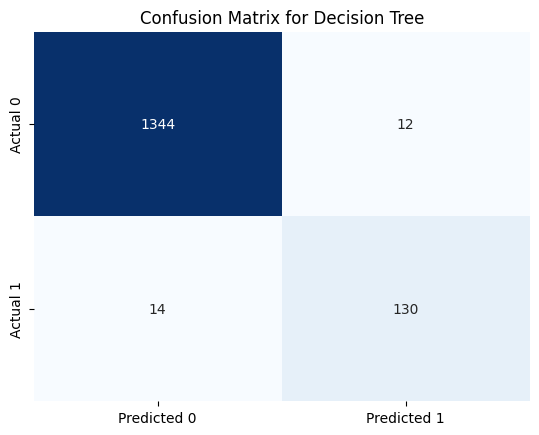

In [78]:
cm = confusion_matrix(y_test, initial_y_pred)                         #Assigning the Test and predicted data to confusion matrix
sns.heatmap(cm, annot = True, fmt ='d',cmap= 'Blues', cbar= False,    #Creating the confusion matrix
            xticklabels = ['Predicted 0', 'Predicted 1'],             #Setting up the Xlabels
            yticklabels = ['Actual 0', 'Actual 1'])                   #Setting up the ylabels
plt.title('Confusion Matrix for Decision Tree')                       #This is the title to Confusion Matrix
plt.show()                                                            #This will show the plot


## Visualize the decision rules and important features

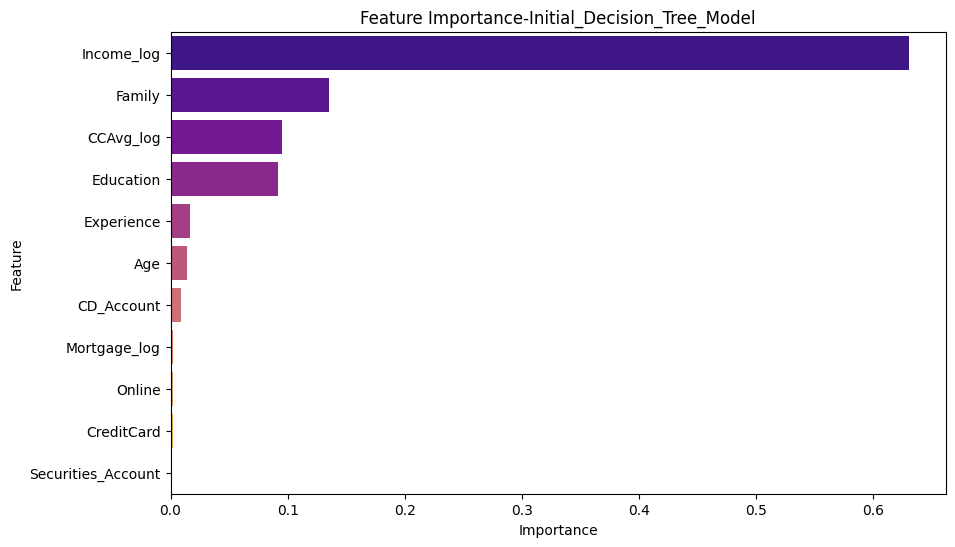

In [79]:

# Feature importances from the trained model (initial_dt)
importances = initial_dt.feature_importances_
feature_names = X_train.columns

# Creating the DataFrame to make the plot with ease
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# showing the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, hue = 'Feature', legend = False, palette='plasma')
plt.title('Feature Importance-Initial_Decision_Tree_Model')
plt.show()



## Observation Feature importance
  Strong Predictor (They can purcahse the loan)
  - **Income :** Higher income, higher chances of taking loan.
  - **CCAvg :** Higher Credit Card spenders  have tendency to take loans.
  - **Family:** Family : Larger family with 2 and 3 family have the probability to take loan..
  - **Education :** Graduate and Advance/Professional are more likely to take loan.

## Visualize the decision Tree

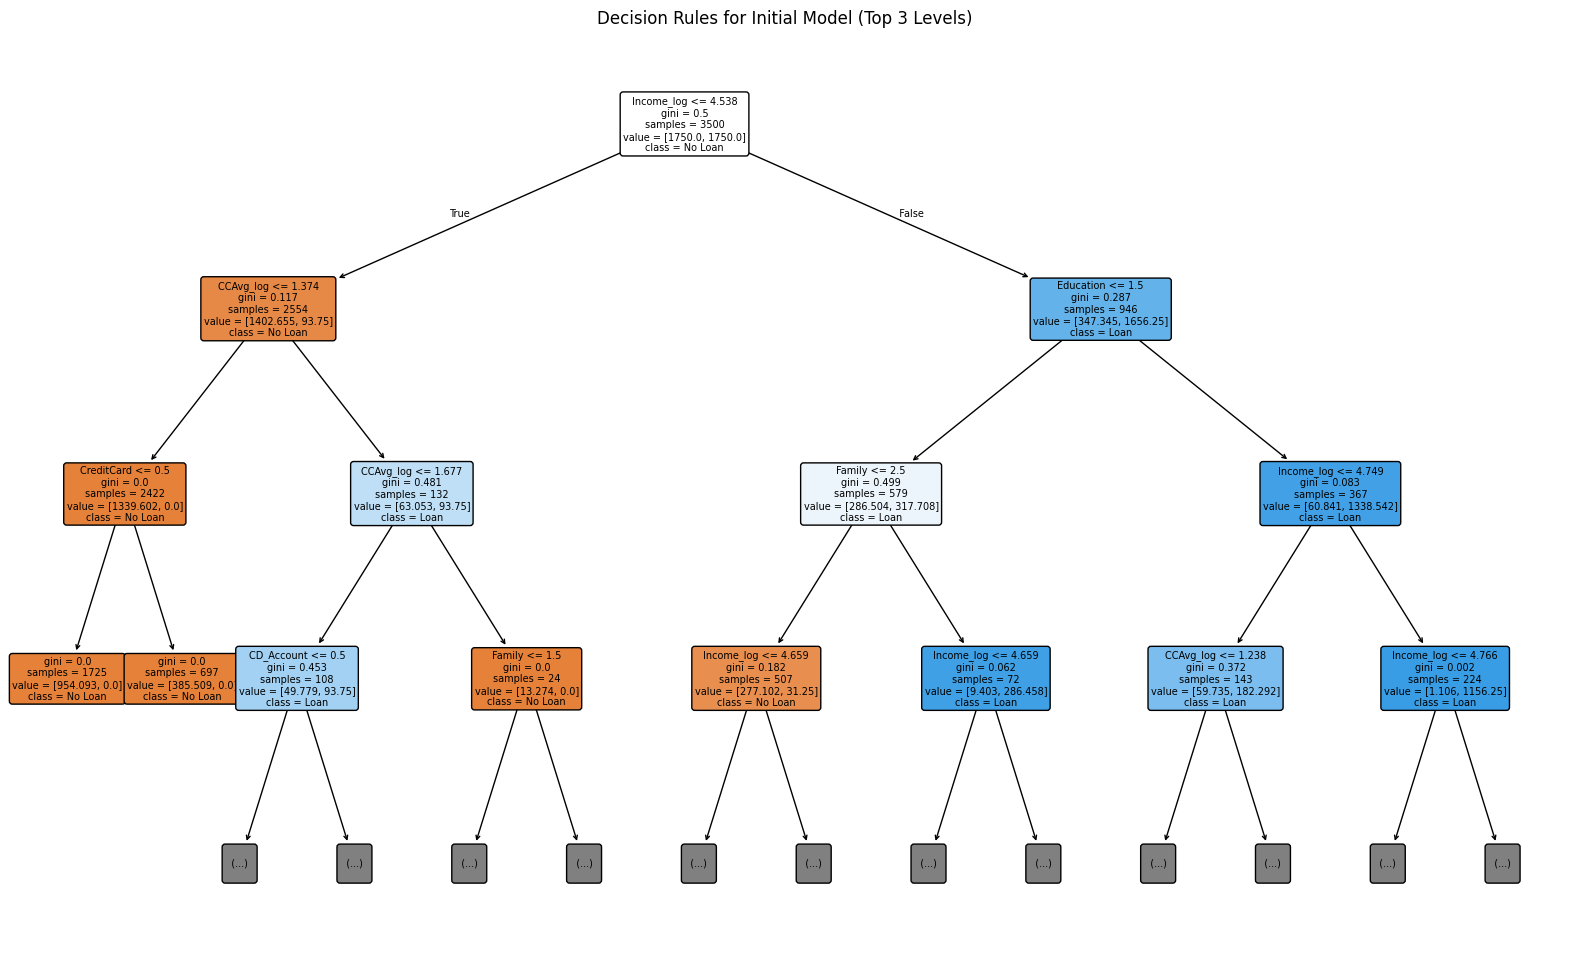

In [80]:
#Visualize the decision
plt.figure(figsize=(20, 12))                                          #Creating the plot with 20 width and 12 inch height
plot_tree(initial_dt,                                                 #This line will draw a tree
          feature_names=X_train.columns,                              #This will bring the features name in Decision Tree
          class_names=['No Loan', 'Loan'],                            #0 is 'No Loan' and 1 is 'Loan'
          filled=True,                                                #It gives the color to nodes as per the majority of result
          rounded=True,
          max_depth=3,                                                # Limit tree depth for better readability
          fontsize=7)                                                 #Size of the Text in Decision Tree

plt.title('Decision Rules for Initial Model (Top 3 Levels)')          #Title of the Decision Tree
plt.show()                                                            # it wil show the Tree.

## Model Performance detailed summary

In [81]:
print('\nInitial Decision Tree model perfomance are the following')
print(f"\nAccuracy: The overall is around {initial_dt.score(X_test, y_test):.2f}. (However Accuracy metrics is not the best due to imbalanced Target Variable)")
print(f"\nPrecision for Class 1 (Accepted loan): {classification_report(y_test, initial_y_pred).splitlines()[3].split()[1]} It says that  when the model predicts a customer will take a loan, it's correct about {float(classification_report(y_test, initial_y_pred).splitlines()[3].split()[1])*100:.2f}% of the time.")
print(f"\nRecall for Class 1 (Loan Accepted): {classification_report(y_test, initial_y_pred).splitlines()[3].split()[2]}  This indicates that  the model recognize about {float(classification_report(y_test, initial_y_pred).splitlines()[3].split()[2])*100:.2f}% of all actual loan acceptors.")
print(f"\nF1-Score for Class 1 (Loan Accepted): {classification_report(y_test, initial_y_pred).splitlines()[3].split()[3]} This is the balancd measure of recall and precision for the positive class.")
print(f"\nROC-AUC Score is {roc_auc_score(y_test, initial_y_pred_probability): .3f} It shows that  model's ability to distinguish between non-acceptors and acceptor of the loan.")


Initial Decision Tree model perfomance are the following

Accuracy: The overall is around 0.98. (However Accuracy metrics is not the best due to imbalanced Target Variable)

Precision for Class 1 (Accepted loan): 0.92 It says that  when the model predicts a customer will take a loan, it's correct about 92.00% of the time.

Recall for Class 1 (Loan Accepted): 0.90  This indicates that  the model recognize about 90.00% of all actual loan acceptors.

F1-Score for Class 1 (Loan Accepted): 0.91 This is the balancd measure of recall and precision for the positive class.

ROC-AUC Score is  0.947 It shows that  model's ability to distinguish between non-acceptors and acceptor of the loan.


## Observation:
- Initial Decision Tree model shows the ability to identify the positibe class(Loan Acceptor)

- Recall for the class 1 looks great which indicates that Bank can identify significant portion of customer who can take the loan

- Precision class 1 might be lower indicated that number of customer can take loan which actually won't (False Positive). I woudl be waste marketing efforts or resources if not managed.

- ROC-AUC- Score showing the great measurement of the model's discriminitive power, which indicates that it's learning ability is beyond random assumptions.

- Overall this is great starting point and now we will proceed to `imporove the model by using pruning techniques`.


## 2. Pre-pruning with GridSearchCV

In [82]:
#Setting up the hyperparameter
param_grid = {
    'max_depth' : [3, 5, 7, 10, None],
    'min_samples_leaf' : [5, 10, 20, 50],
    'min_samples_split' : [10, 20, 50, 100]
}

#initialize the DecisionTree with class_weight as this is important for impbalanced variable
pre_pruned_dt = DecisionTreeClassifier(class_weight= 'balanced', random_state= 42)

#initialize the GridSearchCv for pre-pruning the model
gridsearch = GridSearchCV(estimator = pre_pruned_dt, param_grid = param_grid, cv = 5, scoring = 'roc_auc', n_jobs = -1, verbose =1)

#fitting the model
gridsearch.fit(X_train, y_train)

print('\nBest Pre-Pruned Model is', gridsearch.best_estimator_)

#Defining the best parameter that gridserach has found
best_dt_pre_pruned = gridsearch.best_estimator_

#predicted the model
y_pred_pre_pruned  = best_dt_pre_pruned.predict(X_test)

#Defining the probability for test data
y_pred_probability_pre_pruned = best_dt_pre_pruned.predict_proba(X_test)[:, 1]

print(f'\n Pre-Pruned Model ROC_AUC_SCORE {roc_auc_score(y_test, y_pred_probability_pre_pruned) :.3f}')
print('\nPre-Pruned Model Classification Report')
print(classification_report(y_test, y_pred_pre_pruned))

#Storing the result so that we can access them later for comparison analysis
result['Pre-Pruned-Model'] = {
    'ROC_AUC' : roc_auc_score(y_test, y_pred_probability_pre_pruned),
    'Precision(1)' : classification_report(y_test, y_pred_pre_pruned, output_dict = True)['1']['precision'],
    'Recall(1)' : classification_report(y_test, y_pred_pre_pruned, output_dict= True)['1']['recall'],
    'F1_Score(1)' : classification_report(y_test, y_pred_pre_pruned, output_dict= True)['1']['f1-score']

 }



Fitting 5 folds for each of 80 candidates, totalling 400 fits

Best Pre-Pruned Model is DecisionTreeClassifier(class_weight='balanced', max_depth=5,
                       min_samples_leaf=50, min_samples_split=10,
                       random_state=42)

 Pre-Pruned Model ROC_AUC_SCORE 0.994

Pre-Pruned Model Classification Report
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1356
           1       0.67      0.99      0.80       144

    accuracy                           0.95      1500
   macro avg       0.83      0.97      0.88      1500
weighted avg       0.97      0.95      0.96      1500



## 3. Post-pruning model with Cost Complexity Pruning

In [83]:
#computing the value of ccp_alphas
path = initial_dt.cost_complexity_pruning_path(X_train, y_train)

#Getting the ccp_alphas value
ccp_alphas = path.ccp_alphas

#Excluding the last node to avoid the over pruning because it may lead to underfitting
ccp_alpha = ccp_alphas[:-1]


#Creating the empty list where will store the alpha score later
alpha_score = []
for alpha in ccp_alpha:

  #Initialize the Decision Tree Classifier to get the Alpha Score
  post_pruned_dt = DecisionTreeClassifier(random_state =42, class_weight='balanced', ccp_alpha= alpha)

  #fitting the model
  post_pruned_dt.fit(X_train, y_train)

  #Making the probability for class 1
  y_pred_probability_post_pruned = post_pruned_dt.predict_proba(X_test)[:,1]

  #getting the alph score and appending to the empty list
  alpha_score.append(roc_auc_score(y_test, y_pred_probability_post_pruned))



#Getting the best alpha score
best_alpha = ccp_alpha[np.argmax(alpha_score)]
print(f'\n Best Alpha Score is: {best_alpha: .3f}')


#Initialize the Decision Tree Classifier to get the Best Alpha Score
best_alpha_dt_postpruned = DecisionTreeClassifier(random_state= 42, class_weight = 'balanced', ccp_alpha= best_alpha)

#fitting the model
best_alpha_dt_postpruned.fit(X_train, y_train)
y_pred_best_alpha_post_pruned = best_alpha_dt_postpruned.predict(X_test)

#Making the probability for class 1 of best alpha
y_pred_probability_best_alpha_post_pruned = best_alpha_dt_postpruned.predict_proba(X_test)[:,1]


#Printing the ROC_AUC_SCORE of Post Pruned- Model
print(f'\nPost-Pruned-Model ROC_AUC_SCORE is : {roc_auc_score(y_test, y_pred_probability_best_alpha_post_pruned): .3f}')

#Printing the Classification report of Post Pruned- Model
print('\nPost Pruned- Model Classification Report :')
print(classification_report(y_test, y_pred_best_alpha_post_pruned))



#Storing the result so that we can access them later for comparison analysis
result['Post-Pruned Model'] = {
    'ROC_AUC' : roc_auc_score(y_test, y_pred_probability_best_alpha_post_pruned),
    'Precision(1)' : classification_report(y_test, y_pred_best_alpha_post_pruned, output_dict = True)['1']['precision'],
    'Recall(1)' : classification_report(y_test, y_pred_best_alpha_post_pruned, output_dict= True)['1']['recall'],
    'F1_Score(1)' : classification_report(y_test, y_pred_best_alpha_post_pruned, output_dict= True)['1']['f1-score']
}




 Best Alpha Score is:  0.002

Post-Pruned-Model ROC_AUC_SCORE is :  0.995

Post Pruned- Model Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1356
           1       0.63      1.00      0.77       144

    accuracy                           0.94      1500
   macro avg       0.81      0.97      0.87      1500
weighted avg       0.96      0.94      0.95      1500



#Model Comparison

In [84]:
#printing the result of models
print('Model Comparison')
resutls_df = pd.DataFrame(result).T
resutls_df

Model Comparison


,ROC_AUC,Precision(1),Recall(1),F1_Score(1)
initial_model,0.946964,0.915493,0.902778,0.909091
Pre-Pruned-Model,0.994146,0.666667,0.986111,0.795518
Post-Pruned Model,0.994630,0.628821,1.000000,0.772118


## Selecting the Best Model

In [85]:
# Selecting best model based on ROC-AUC score
best_model_name = resutls_df['ROC_AUC'].idxmax()
print(f"\nAfter analysis of all model, Based on ROC-AUC score, the best model is: '{best_model_name}'")


After analysis of all model, Based on ROC-AUC score, the best model is: 'Post-Pruned Model'


## Visualize Important Features

In [86]:

importances = best_alpha_dt_postpruned.feature_importances_                                 # Feature importances from the trained model (Post-Pruned)
feature_names = X_train.columns                                                             #Getting the columns name from Trained set


feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})  #Creating the DataFrame to make the plot with ease.
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)  #This will sort the importance features in Desceding Order


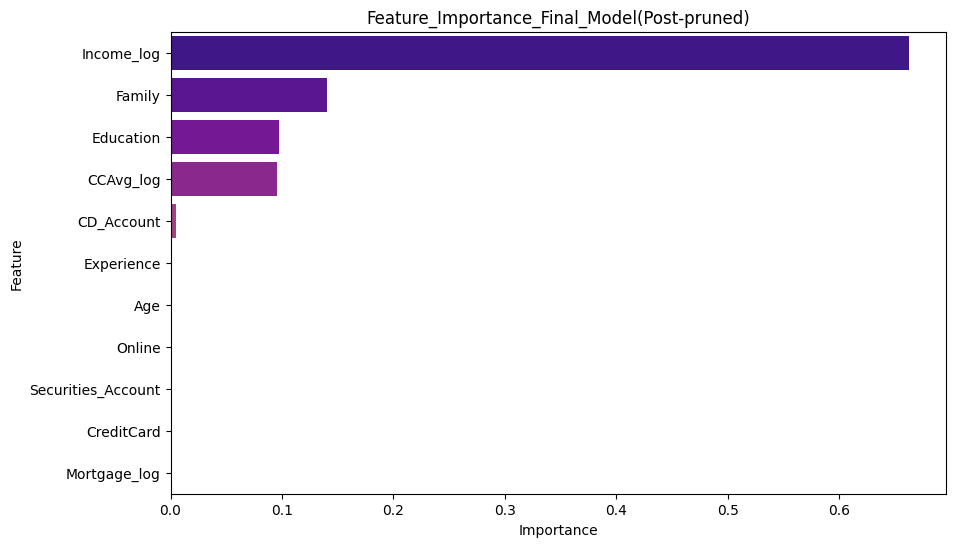

In [87]:
plt.figure(figsize=(10, 6))                                                                 #This will create the plot with 10 width and 6 inch height
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, hue = 'Feature', legend = False, palette='plasma')                        #This will create the barplot
plt.title('Feature_Importance_Final_Model(Post-pruned)')                                    #This would be the title of Plot
plt.savefig('Feature_Importance_Final_Model.png')                                           #This will save the plot in png format
plt.show();                                                                                 # This will show the plot

##Observation from Feature importance (Post-Pruned)
- After pruning the final model (Post-Pruned) top 3 features are 'Income', 'CCAvg' and Income  and 'CCAvg' is close to 4th. This confirms that Family size also plays an important role when it comes to predicting of loan acceptance, along with other two variables, Income and Education Level

#Visualize Decision Rules (The Post-Pruned Tree)

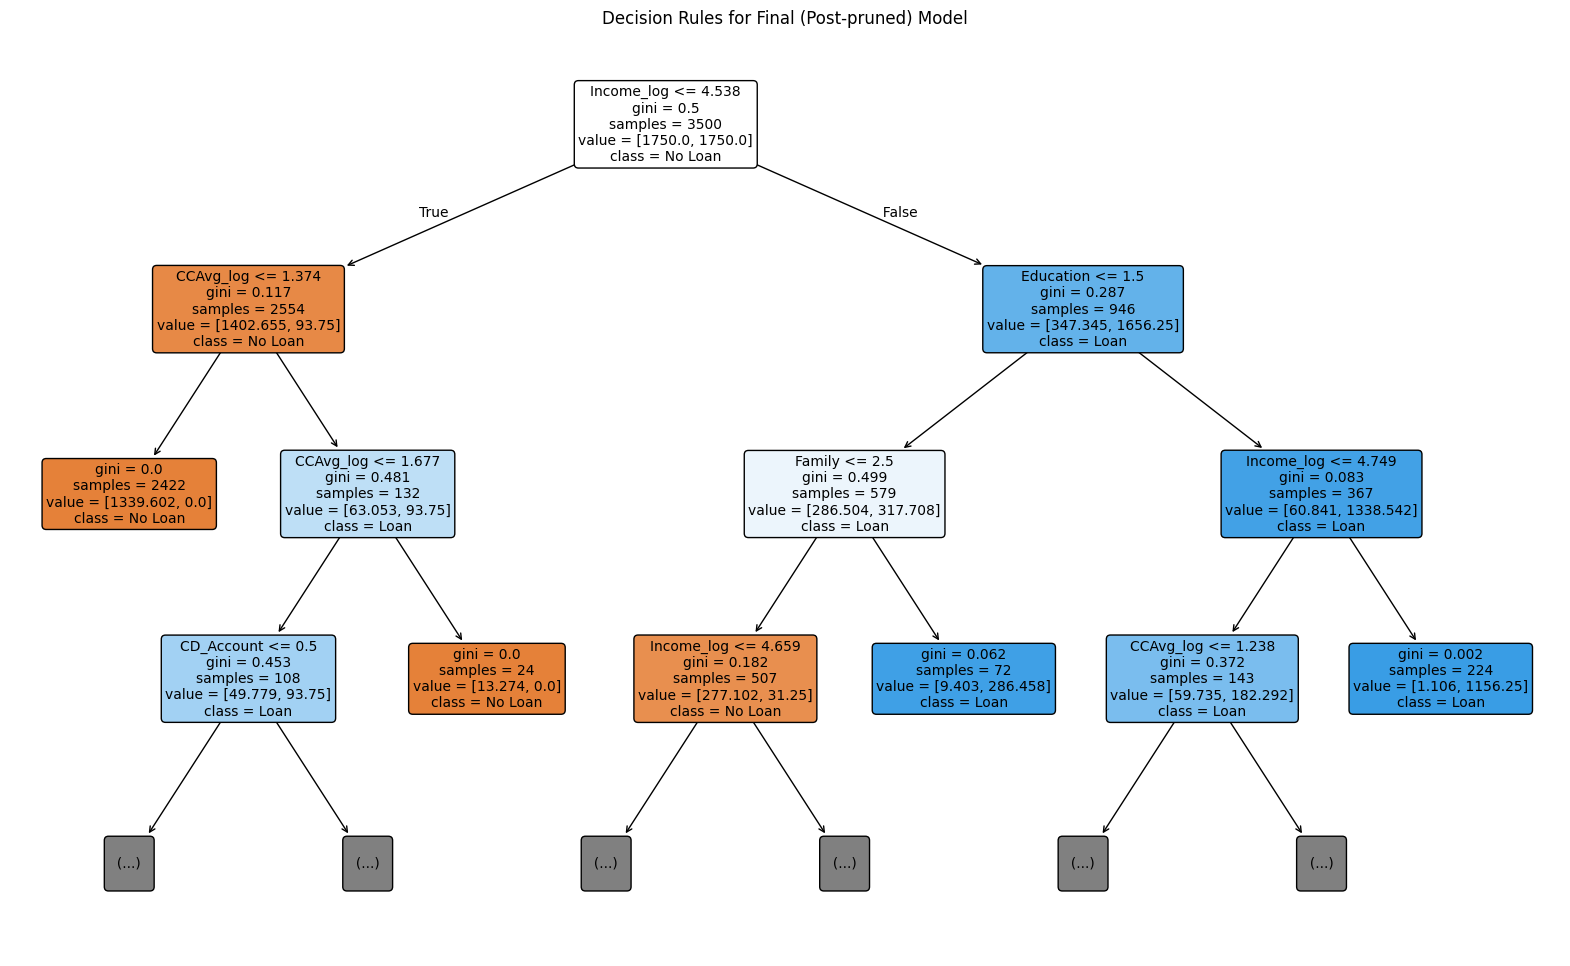

In [88]:
plt.figure(figsize=(20, 12))                                           #This will create the plot with 20 width and 12 inch height
plot_tree(best_alpha_dt_postpruned,                                    #This linek will plot the tree
          feature_names=X_train.columns,                               #This will bring the features name in Decision Tree
          class_names=['No Loan', 'Loan'],                             #0 is 'No Loan' and 1 is 'Loan'
          filled=True,                                                 #It gives the color to nodes as per the majority of result
          rounded=True,
          max_depth=3,                                                 #Limiti  ng depth to 3 for readability
          fontsize=10)                                                 #Text size of Tree
plt.title('Decision Rules for Final (Post-pruned) Model')              #This woould be the title of Decision Tree
plt.savefig('final_model_decision_tree.png')                            #This will save the plot in png format

##Observation Post-Pruned - Decision Tree

-  This Tree is from Final (Post-Pruned Model). We can see that Decision making process is highly depended on income, Education  and CCAvg which indicates how these 3 columns are more important to predict the loan acceptance.

#Actionable Insights & Recommendations

- We have made 3 different models and compare them and we have found the best Model is Post-Pruned Decision Tree Model
 - **Why Post-Pruned Decision Tree Model** ? : Because Post-Pruned Decision Tree Model has the best ROC_AUC_Score (0.995) which means this model has the great ability to identify which customer would purchase the loan and which customer would not.

 - **Biggest features of this model** :  This model proves Recall score is 100% which means this model has the ability to identify all potential customer who can purchase the loan.

  - This would be great strategy for marketing team because by using this model they won't miss any possible leads.

## Key Driver for the Loan Acceptance.
- This model has identify some key features which can predict wheather the customer woudl purchase the loan or not.

 - **Income** :  This is one of the strong predictor. There are higher chance of purchasing the loan by higher income customer.

 - **Education** : Graduate (Level 2) and Advance/Professional(Lever 3) are take more loans compare than Undergraduate (Level 1)

 - **CCAvg (Credit Card Average Spending)** : . Category of this features spends more on their daily life which actually make them intrested to purcahse the loan.

 - **CD_Account** : Customer who has alrady the Customer Deposite account they are strong predictor to purchase the loan.

##Actionable Steps or Recommendations for Marketing Team (Advice for campaign)

- Following are the insights on which the marketing team should make the strategy for campaign.

- **Target to Higher income customers**:  
 - **Action:**  Marketing team needs to mentioned the high income customer's on the top priority specially for the customers who's annual income is more than $90k because in the model analysis their conversion rate is too high.
- **More Focused on Educated Professionals**:  
 - **Action:**  Campaign should design to attract Graduate/Professionals customers. Marketing Messages (SMS) should be lucarative towards fulfilling thier financial needs.

- **Identify High Spenders**:  
 - **Action:**  Marketing team should target those customer who have their Credit Card Spending (CCAvg) more than $2.5K because it shows their financial health and their need of Credit.

- **Leveraging Existing Customer Relationship**:  
 - **Action:**  CD Account holder are the strong predictor to buy the loan. Marketing team should target them by offering Pre-Approved Personal Loan because they already have the good and financial realationshipt with Bank.  

## Ideal Customer Profile fit for Campaign.
 - The customer who is Graudate/ Advance Professional also who spends enough on his/her credit card, it would be much better if she/he has the CD Account in Bank so the customer who have all the combination is perfect target and there would be high probability to purcahse the loan.

# Conclusion for Personal Loan Campaign

- In this project we have sucessfully analyze data of AllLife Bank Customer's and we have made the highly accurate predictive model(Post-Pruned Decision Tree) which has the potential to identify with 99.5% effective rate those custtomer who would purcahse the loan.

- Instead of targeting to all Bank Customers, marketing team can take the advantage of this model and make the targeted list for campaign. By doing this team will use the best use of campaign resources.

- This model will not just improve the conversion rate it will also increase the (ROI) Significantly.

- So the project has been completed and we have sucessfully moved from Business problem to actionable solution.